## Importing Libraries and Loading Data

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import os

%matplotlib inline
plt.style.use('dark_background')

print(f"Seaborn version: {sns.__version__}")

Seaborn version: 0.13.2


In [52]:
df = pd.read_csv('data2.csv')
print("Initial shape:", df.shape)
df.head()

Initial shape: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Data Exploration

In [53]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Exploring Uniqueness of each column

In [54]:
[(col, df[col].nunique(), df[col].dtype) for col in df.columns]

[('age', 73, dtype('int64')),
 ('workclass', 9, dtype('O')),
 ('fnlwgt', 21648, dtype('int64')),
 ('education', 16, dtype('O')),
 ('education.num', 16, dtype('int64')),
 ('marital.status', 7, dtype('O')),
 ('occupation', 15, dtype('O')),
 ('relationship', 6, dtype('O')),
 ('race', 5, dtype('O')),
 ('sex', 2, dtype('O')),
 ('capital.gain', 119, dtype('int64')),
 ('capital.loss', 92, dtype('int64')),
 ('hours.per.week', 94, dtype('int64')),
 ('native.country', 42, dtype('O')),
 ('income', 2, dtype('O'))]

### Exploring Income column distribution in dataset

In [55]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

#### Income vs Gender/Sex

<Axes: xlabel='income', ylabel='count'>

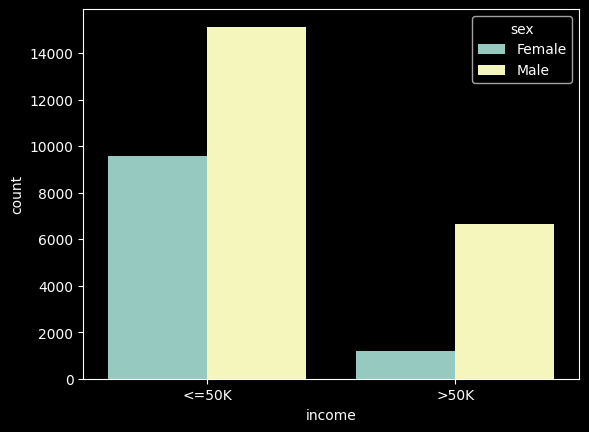

In [56]:
sns.countplot(x='income', hue='sex', data=df)

#### Income vs Race

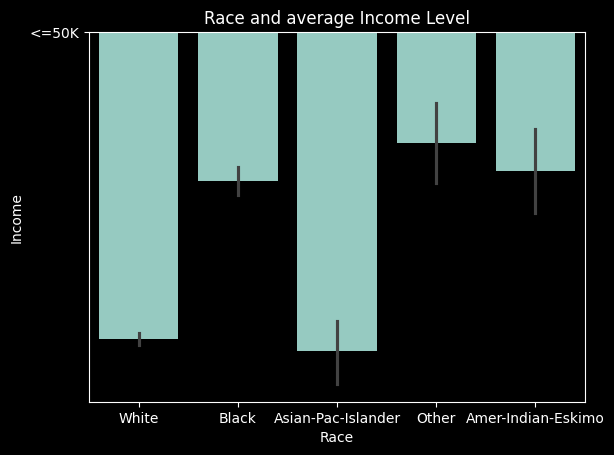

In [57]:
sns.barplot(y="income", x="race", data=df)
plt.xlabel("Race")
plt.ylabel("Income")
plt.title("Race and average Income Level")
plt.show()

#### Income vs Workclass

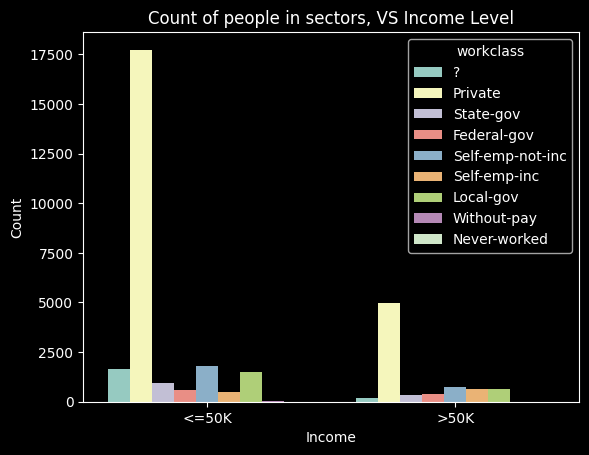

In [58]:
sns.countplot(x='income', hue='workclass', data=df)
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Count of people in sectors, VS Income Level")
plt.show()

#### Income vs Education

['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]


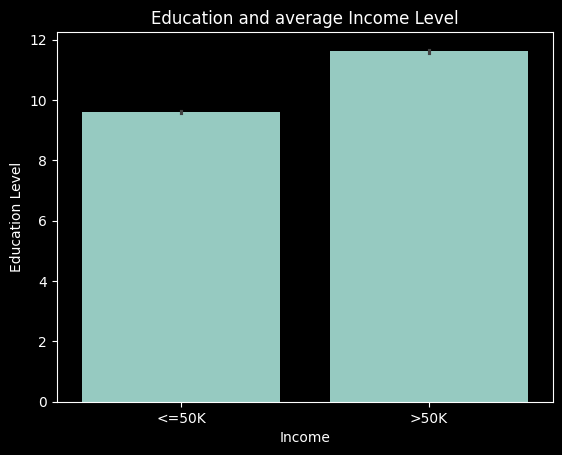

In [59]:
# %%
print(df['education'].unique())
print(df['education.num'].unique())

# %%
sns.barplot(y='education.num', x='income', data=df)
plt.xlabel("Income")
plt.ylabel("Education Level")
plt.title("Education and average Income Level")
plt.show()

#### Income vs Occupation

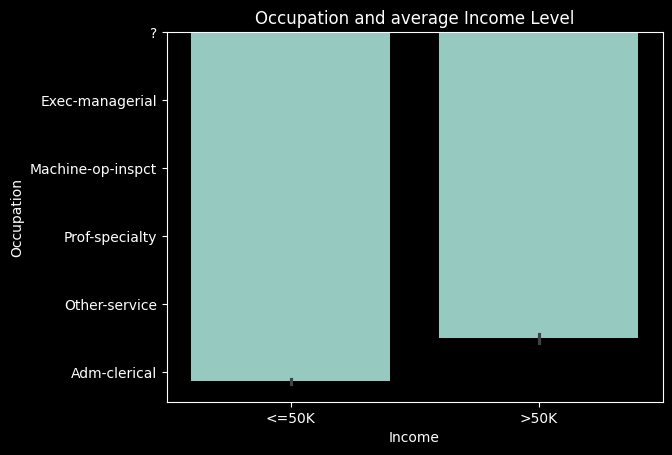

In [60]:
sns.barplot(y='occupation', x='income', data=df)
plt.xlabel("Income")
plt.ylabel("Occupation")
plt.title("Occupation and average Income Level")
plt.show()

### Exploring other columns in the dataset

#### Age vs Income Level

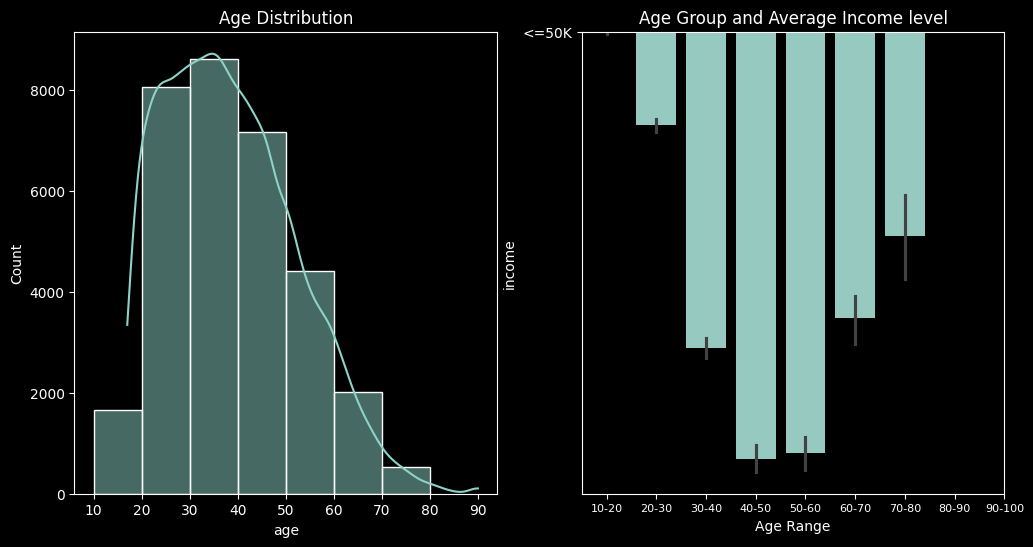

In [61]:
# Create bins for age groups (10-year intervals)
bins = np.arange(10, 90, 10)

# Cut ages into bins
df["age_bin"] = pd.cut(df["age"], bins, labels=range(len(bins)-1))

age_ranges = [f"{i}-{i+10}" for i in range(10, 100, 10)]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the count plot
plt.subplot(1, 2, 2)
sns.barplot(x="age_bin", y="income", data=df, ax=axes[1])
plt.xlabel("Age Range")
axes[1].set_title('Age Group and Average Income level')
plt.xticks(range(len(age_ranges)), age_ranges, size=8)

# Create a Histogram plot
sns.histplot(df['age'], bins=range(10, 90, 10), kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

plt.show()

#### Work Hours vs Income level

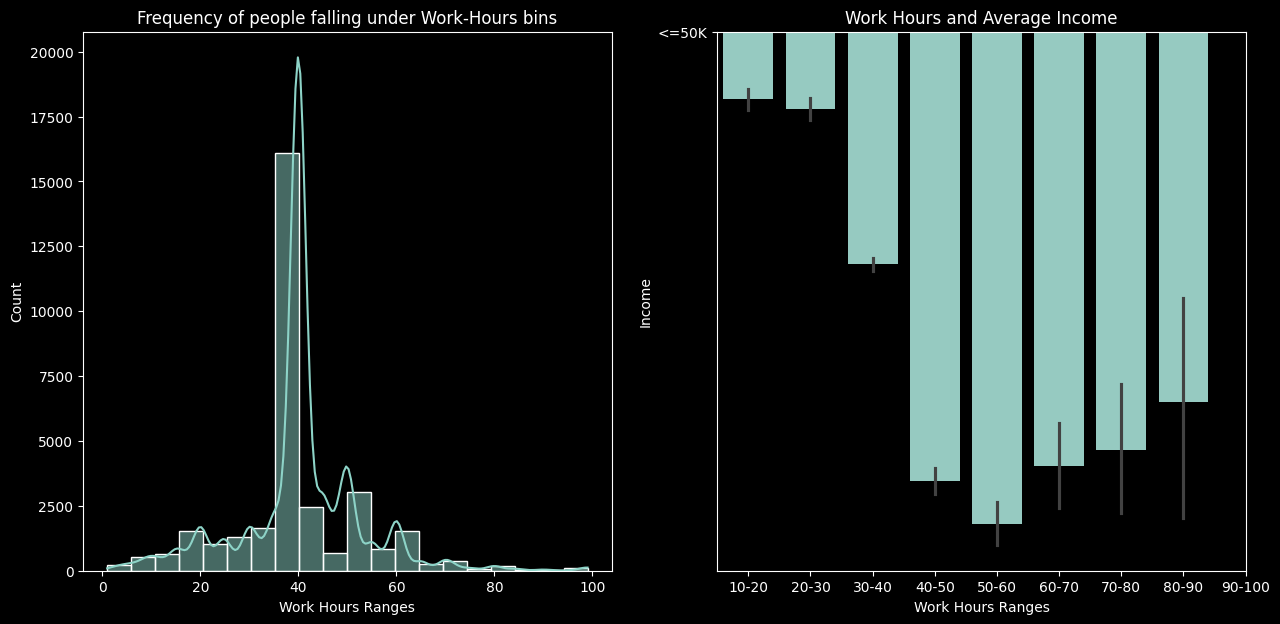

In [62]:
# Create bins for work hours groups (10-hour intervals)
bins = np.arange(10, 100, 10)

# Cut work hours into bins
df["work_hours_bin"] = pd.cut(df["hours.per.week"], bins, labels=range(len(bins)-1))

work_hours_ranges = [f"{i}-{i+10}" for i in range(10, 100, 10)]
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(1,2,1)
sns.histplot(x=df['hours.per.week'], kde=True, bins=20)
plt.xlabel("Work Hours Ranges")
plt.ylabel("Count")
plt.title("Frequency of people falling under Work-Hours bins")

plt.subplot(1,2,2)
sns.barplot(x="work_hours_bin", y="income", data=df)
plt.xlabel("Work Hours Ranges")
plt.ylabel("Income")
plt.xticks(range(len(work_hours_ranges)), work_hours_ranges)
plt.title("Work Hours and Average Income")

plt.show()


#### Native Country vs Income Level

Text(0.5, 1.0, 'Country-wise Income')

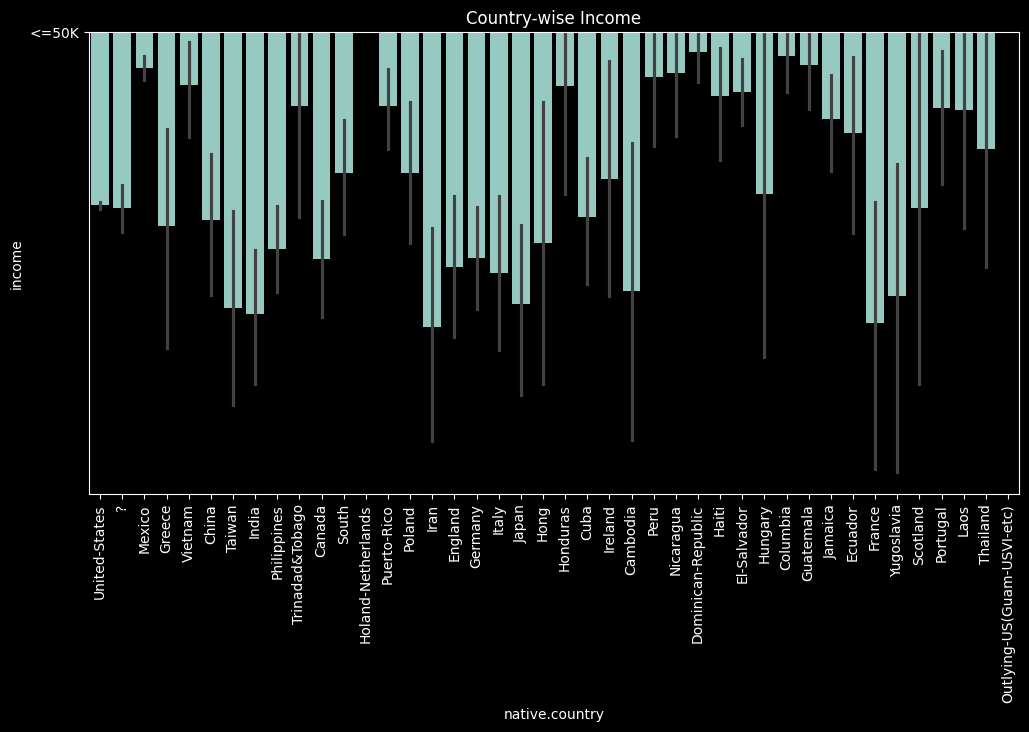

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x='native.country', y='income', data=df)
plt.xticks(rotation=90)
plt.title('Country-wise Income')


#### Capital Gain and Capital Loss vs Income

Text(0.5, 1.0, 'Capital Loss vs. Income')

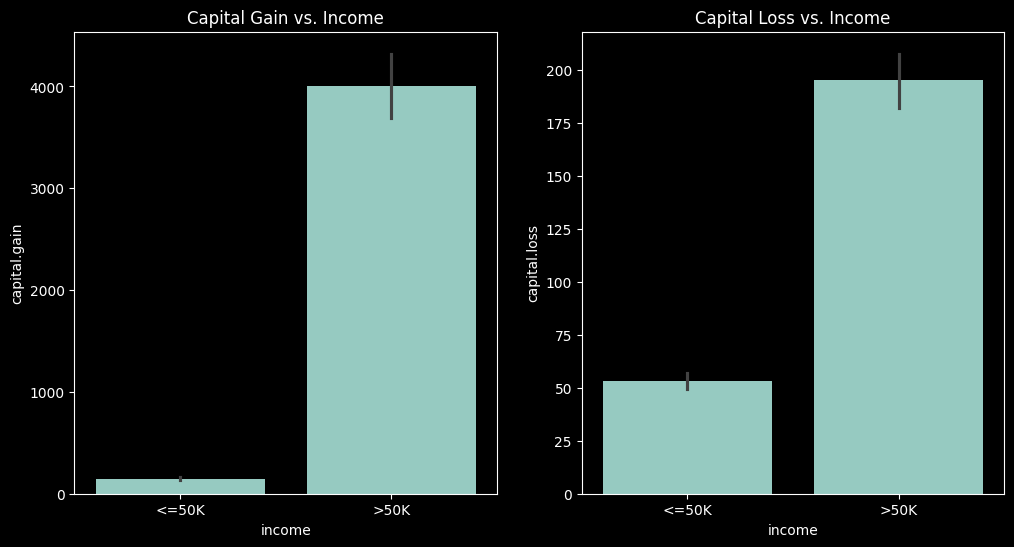

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Capital Gain vs. Income
sns.barplot(x='income', y='capital.gain', data=df, ax=axes[0])
axes[0].set_title('Capital Gain vs. Income')

# Scatter plot for Capital Loss vs. Income
sns.barplot(x='income', y='capital.loss', data=df, ax=axes[1])
axes[1].set_title('Capital Loss vs. Income')

## Data Preprocessing

### Handling Duplicate Values


In [65]:
## Data Preprocessing

In [66]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()
print("Shape after removing duplicates:", df_no_duplicates.shape)

# Check the difference
rows_removed = len(df) - len(df_no_duplicates)
print(f"Number of rows removed: {rows_removed}")

# Update df to the deduplicated dataframe
df = df_no_duplicates

Number of duplicate rows: 24
Shape after removing duplicates: (32537, 17)
Number of rows removed: 24


### Handling Missing Values

In [67]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Replace '?' with NaN
df = df.replace('?', pd.NA)

# Check for missing values again
print("\nMissing values after replacing '?' with NaN:")
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()
print("\nShape after removing missing values:", df.shape)


Missing values before cleaning:
age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country      0
income              0
age_bin            98
work_hours_bin    843
dtype: int64

Missing values after replacing '?' with NaN:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
age_bin             98
work_hours_bin     843
dtype: int64

Shape after removing missing values: (29463, 17)


### Outlier Detection and Removal

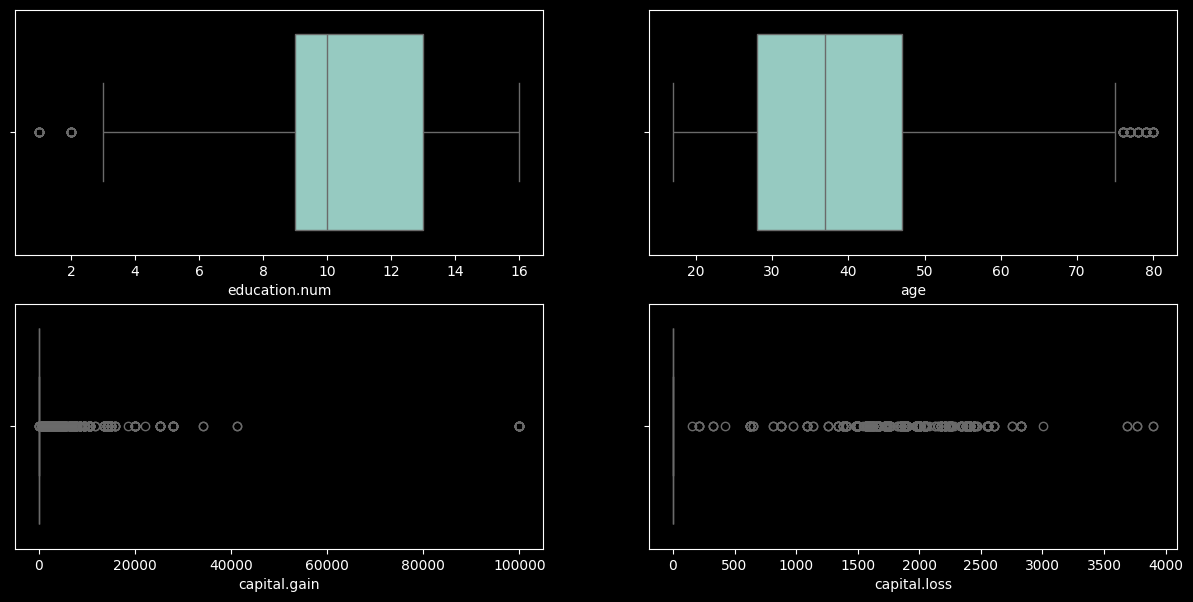

Shape after removing outliers: (25344, 17)


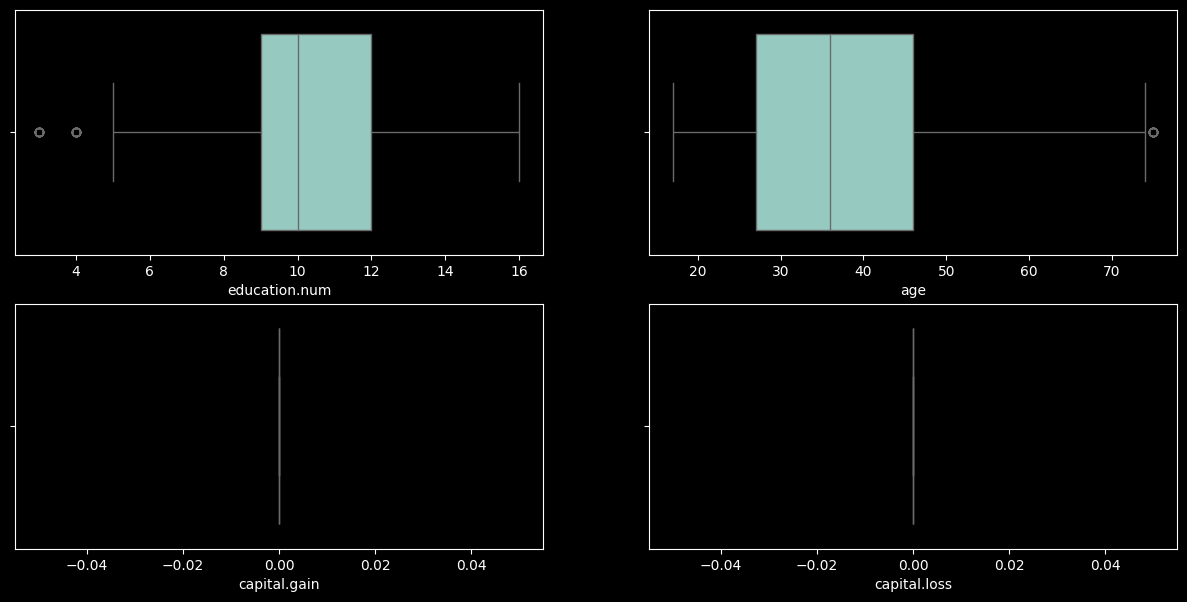

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
sns.boxplot(x='education.num', data=df, ax=axes[0, 0])
sns.boxplot(x='age', data=df, ax=axes[0, 1])
sns.boxplot(x='capital.gain', data=df, ax=axes[1, 0])
sns.boxplot(x='capital.loss', data=df, ax=axes[1, 1])
plt.show()

columns = ['age', 'education.num', 'capital.gain', 'capital.loss']

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the specified columns
df = remove_outliers(df, columns)
print("Shape after removing outliers:", df.shape)

fig, axes = plt.subplots(2, 2, figsize=(15, 7))
sns.boxplot(x='education.num', data=df, ax=axes[0, 0])
sns.boxplot(x='age', data=df, ax=axes[0, 1])
sns.boxplot(x='capital.gain', data=df, ax=axes[1, 0])
sns.boxplot(x='capital.loss', data=df, ax=axes[1, 1])
plt.show()


### Feature Engineering and Encoding

In [69]:
# Workclass mapping
workclass_map = {
    'Federal-gov': 'Federal Government',
    'Local-gov': 'Local Government',
    'Private': 'Private Sector',
    'Self-emp-inc': 'Self-Employed (Incorporated)',
    'Self-emp-not-inc': 'Self-Employed (Not Incorporated)',
    'State-gov': 'State Government',
    'Without-pay': 'Without Pay'
}

# Occupation mapping
occupation_map = {
    'Adm-clerical': 'Administrative/Clerical',
    'Armed-Forces': 'Armed Forces',
    'Craft-repair': 'Craft/Repair',
    'Exec-managerial': 'Executive/Managerial',
    'Farming-fishing': 'Farming/Fishing',
    'Handlers-cleaners': 'Handlers/Cleaners',
    'Machine-op-inspct': 'Machine Operators/Inspectors',
    'Other-service': 'Other Service',
    'Priv-house-serv': 'Private Household Service',
    'Prof-specialty': 'Professional Specialty',
    'Protective-serv': 'Protective Services',
    'Sales': 'Sales',
    'Tech-support': 'Technical Support',
    'Transport-moving': 'Transportation/Moving'
}

# Education level mapping
education_map = {
    1: 'Preschool',
    2: '1st to 4th Grade',
    3: '5th to 6th Grade',
    4: '7th to 8th Grade',
    5: '9th Grade',
    6: '10th Grade',
    7: '11th Grade',
    8: '12th Grade',
    9: 'High School Graduate',
    10: 'Some College',
    11: 'Vocational School',
    12: 'Academic Associate Degree',
    13: 'Bachelor\'s Degree',
    14: 'Master\'s Degree',
    15: 'Professional School',
    16: 'Doctorate'
}

# Encode categorical features with more user-friendly names
df['workclass'] = df['workclass'].map(workclass_map)
df['occupation'] = df['occupation'].map(occupation_map)
df['education.num'] = df['education.num'].map(education_map)

# Encode categorical variables
label_encoders = {}
for column in ['workclass', 'occupation', 'sex', 'education.num']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Encode target variable
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_bin,work_hours_bin
4231,50,4,83311,Bachelors,7,Married-civ-spouse,3,Husband,White,1,0,0,13,United-States,0,3,0
4232,38,2,215646,HS-grad,9,Divorced,5,Not-in-family,White,1,0,0,40,United-States,0,2,2
4233,53,2,234721,11th,1,Married-civ-spouse,5,Husband,Black,1,0,0,40,United-States,0,4,2
4234,28,2,338409,Bachelors,7,Married-civ-spouse,9,Wife,Black,0,0,0,40,Cuba,0,1,2
4235,37,2,284582,Masters,10,Married-civ-spouse,3,Wife,White,0,0,0,40,United-States,0,2,2


In [70]:
columns_to_keep = [
    'income', 'education.num', 'age', 'hours.per.week', 'sex', 'workclass', 'occupation'
]
df = df.loc[:, columns_to_keep]
print("Shape after feature selection:", df.shape)

Shape after feature selection: (25344, 7)


## Correlation Analysis

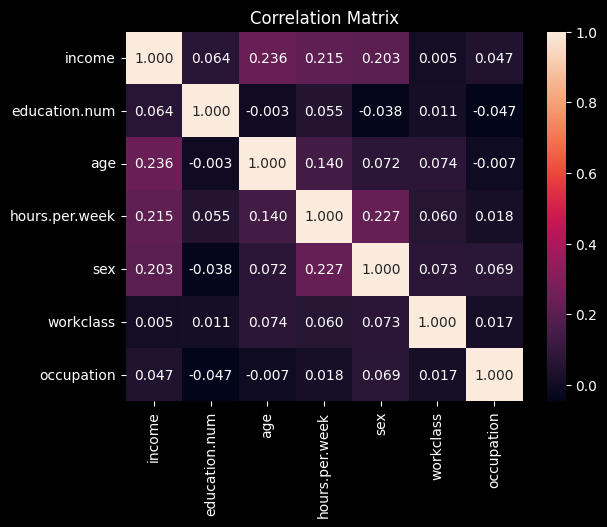

In [71]:
sns.heatmap(df.corr(), annot=True, fmt='.3f')
plt.title("Correlation Matrix")
plt.show()

## Model Training and Evaluation

Accuracy: 0.8315360336664913
Confusion Matrix:
 [[5688  429]
 [ 852  635]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      6117
           1       0.60      0.43      0.50      1487

    accuracy                           0.83      7604
   macro avg       0.73      0.68      0.70      7604
weighted avg       0.82      0.83      0.82      7604



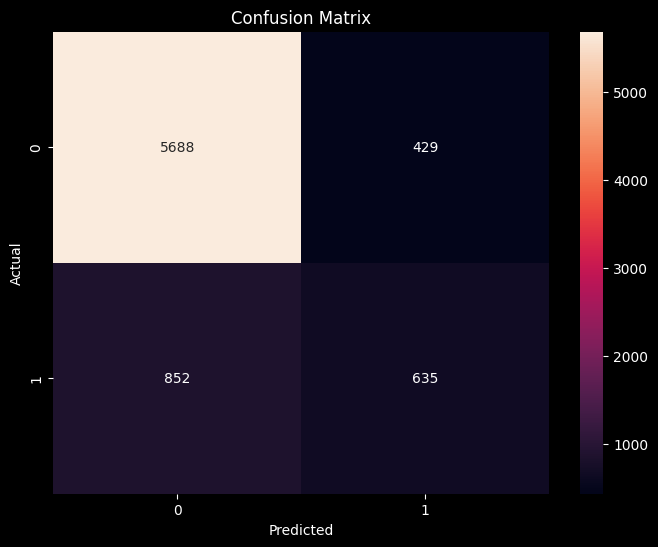

In [73]:
# Splitting data into features and labels
X = df.drop('income', axis=1)
y = df['income']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the model
xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss', n_estimators=100)
xgb_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Save Model and Preprocessing Objects

In [75]:
# Save the model, scaler, and label encoders
model_path = 'xgb_model.pkl'
scaler_path = 'scaler.pkl'
label_encoder_path = 'label_encoders.pkl'

joblib.dump(xgb_clf, model_path)
joblib.dump(scaler, scaler_path)
joblib.dump(label_encoders, label_encoder_path)

# Check if the files are created
if os.path.exists(model_path) and os.path.exists(scaler_path) and os.path.exists(label_encoder_path):
    print(f"Model saved to {model_path}")
    print(f"Scaler saved to {scaler_path}")
    print(f"Label encoders saved to {label_encoder_path}")
else:
    print("Error: Files not saved.")



Model saved to xgb_model.pkl
Scaler saved to scaler.pkl
Label encoders saved to label_encoders.pkl
